# <center>【案例】群聊关键字检测分析</center>

<div class="toc"><ul class="toc-item"><li><span><a href="# 1-读取数据以及数据整理" data-toc-modified-id=" 1-读取数据以及数据整理-1"> 1 读取数据以及数据整理</a></span><ul class="toc-item"><li><span><a href="# 1.1-分别提取日期、用户名、聊天内容" data-toc-modified-id=" 1.1-分别提取日期、用户名、聊天内容-1.1"> 1.1 分别提取日期、用户名、聊天内容</a></span></li><li><span><a href="# 1.2-分离日期与用户名" data-toc-modified-id=" 1.2-分离日期与用户名-1.2"> 1.2 分离日期与用户名</a></span></li><li><span><a href="# 1.3-合并日期、用户名、聊天内容" data-toc-modified-id=" 1.3-合并日期、用户名、聊天内容-1.3"> 1.3 合并日期、用户名、聊天内容</a></span></li></ul></li><li><span><a href="# 2-探索性分析" data-toc-modified-id=" 2-探索性分析-2"> 2 探索性分析</a></span><ul class="toc-item"><li><span><a href="# 2.1-谁是话痨" data-toc-modified-id=" 2.1-谁是话痨-2.1"> 2.1 谁是话痨</a></span></li><li><span><a href="# 2.2-聊天密度周分布" data-toc-modified-id=" 2.2-聊天密度周分布-2.2"> 2.2 聊天密度周分布</a></span></li><li><span><a href="# 2.3-聊天密度小时分布" data-toc-modified-id=" 2.3-聊天密度小时分布-2.3"> 2.3 聊天密度小时分布</a></span></li><li><span><a href="# 2.4-聊天密度日期分布" data-toc-modified-id=" 2.4-聊天密度日期分布-2.4"> 2.4 聊天密度日期分布</a></span></li><li><span><a href="# 2.5-活跃天数最多的用户" data-toc-modified-id=" 2.5-活跃天数最多的用户-2.5"> 2.5 活跃天数最多的用户</a></span></li><li><span><a href="# 2.6-活跃用户数与发言量的关系" data-toc-modified-id=" 2.6-活跃用户数与发言量的关系-2.6"> 2.6 活跃用户数与发言量的关系</a></span></li><li><span><a href="# 2.7-大家都在聊啥" data-toc-modified-id=" 2.7-大家都在聊啥-2.7"> 2.7 大家都在聊啥(词云绘制)</a></span></li></ul></li></ul></div>

In [1]:
#导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Simhei']       # 解决中文乱码问题
plt.rcParams['axes.unicode_minus'] = False         # 解决坐标轴刻度负号乱码

##  1 读取数据以及数据整理

Python中open方法详解：https://www.runoob.com/python/file-methods.html

In [4]:
with open("qq聊天.txt",mode='r',encoding='utf-8-sig') as file:
    data=file.read()

In [5]:
data[:100]

'2018-08-13 6:11:11 古柳_DesertsX(395460632)\n人在家中坐，锅从天上来。多图预警，数据科学小项目走起。代码将来源在 ：https://github.com/Dese'

In [6]:
data1 = data.split('\n\n')
data1[:5]

['2018-08-13 6:11:11 古柳_DesertsX(395460632)\n人在家中坐，锅从天上来。多图预警，数据科学小项目走起。代码将来源在 ：https://github.com/DesertsX/gulius-projects',
 '2018-08-13 6:11:11 古柳_DesertsX(395460632)\nhttp://url.cn/5zx2y5b',
 '2018-08-13 6:41:28 \u202d(1339277368)\n[表情][表情]',
 '2018-08-13 6:46:27 古柳_DesertsX(395460632)\n[图片]',
 '2018-08-13 6:46:49 古柳_DesertsX(395460632)\n[图片]']

In [7]:
len(data1)

1752

提取出所有日期开头的 并且有内容的数据：

In [8]:
content=[] 

for i,j in enumerate(data1):
    after_strip=j.strip() #去除字符串前后空格
    if after_strip=='' or after_strip[:4]!='2018':
        continue
    content.append(after_strip)

In [9]:
len(content)

1743

查看不符合要求的数据：

In [10]:
# n = 0
# for i in data1:
#     if i.strip()=="" or i.strip()[:4]!='2018':
#         n = n+1
#         print(i)
#         print("*"*10)

# n

###  1.1 分别提取日期、用户名、聊天内容

In [11]:
time = [i.split("\n")[0][:19] for i in content]
name =  [i.split("\n")[0][19:] for i in content]
detail = [i.split("\n")[1:] for i in content]

In [12]:
print(len(detail))
print(len(time))
print(len(name))

1743
1743
1743


###  1.2 处理用户名

In [13]:
name[1729]

'\u3000\u3000\u3000\u3000\u3000\u3000\u3000\u3000优雅编程(64520442)'

In [14]:
name = [i.strip() for i in name]

In [15]:
name[1729]

'优雅编程(64520442)'

In [16]:
df = pd.DataFrame([time,name,detail],index=["日期","用户名","聊天内容"]).T
df.head()

,日期,用户名,聊天内容
0,2018-08-13 6:11:11,古柳_DesertsX(395460632),[人在家中坐，锅从天上来。多图预警，数据科学小项目走起。代码将来源在 ：https://gi...
1,2018-08-13 6:11:11,古柳_DesertsX(395460632),[http://url.cn/5zx2y5b]
2,2018-08-13 6:41:28,‭(1339277368),[[表情][表情]]
3,2018-08-13 6:46:27,古柳_DesertsX(395460632),[[图片]]
4,2018-08-13 6:46:49,古柳_DesertsX(395460632),[[图片]]


##  2 探索性分析

In [17]:
df.shape

(1743, 3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日期      1743 non-null   object
 1   用户名     1743 non-null   object
 2   聊天内容    1743 non-null   object
dtypes: object(3)
memory usage: 41.0+ KB


In [19]:
df.isnull().sum()

日期      0
用户名     0
聊天内容    0
dtype: int64

###  2.1 谁是话痨

In [20]:
df["用户名"].value_counts()

桥边红药(2739529317)          144
晚风拂杨柳(3227648426)         118
音乐(812401873)              80
优雅编程(64520442)             74
於清樂(1643147099)            66
                         ... 
脑袋空空(609324343)             1
大目王(657776014)              1
阿鸡(1519816145)              1
「related:」(2119322398)      1
(571359684)                 1
Name: 用户名, Length: 152, dtype: int64

In [21]:
#得到话痨的名字
df["用户名"].value_counts().index[0]

'桥边红药(2739529317)'

###  2.2 聊天密度周分布

In [22]:
df["日期"] = pd.to_datetime(df["日期"] )

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1743 entries, 0 to 1742
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      1743 non-null   datetime64[ns]
 1   用户名     1743 non-null   object        
 2   聊天内容    1743 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 41.0+ KB


把字段'日期'变成索引：

In [24]:
df1=df.copy()

In [25]:
df1.index=df1["日期"]

In [26]:
df1.head()

,日期,用户名,聊天内容
日期,,,
2018-08-13 06:11:11,2018-08-13 06:11:11,古柳_DesertsX(395460632),[人在家中坐，锅从天上来。多图预警，数据科学小项目走起。代码将来源在 ：https://gi...
2018-08-13 06:11:11,2018-08-13 06:11:11,古柳_DesertsX(395460632),[http://url.cn/5zx2y5b]
2018-08-13 06:41:28,2018-08-13 06:41:28,‭(1339277368),[[表情][表情]]
2018-08-13 06:46:27,2018-08-13 06:46:27,古柳_DesertsX(395460632),[[图片]]
2018-08-13 06:46:49,2018-08-13 06:46:49,古柳_DesertsX(395460632),[[图片]]


In [27]:
df2=df1.resample('W').count()
df2

,日期,用户名,聊天内容
日期,,,
2018-08-19,1305,1305,1305
2018-08-26,438,438,438


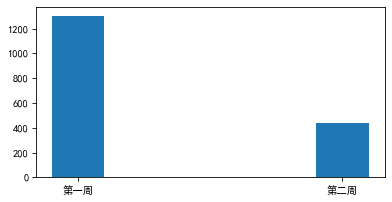

In [28]:
plt.figure(figsize=(6,3),dpi=75)
plt.bar(['第一周','第二周'],df2["用户名"],width=0.2)
plt.show()

###  2.3 聊天密度小时分布

In [29]:
df1.index.name = "time" #更改索引的名字

In [30]:
df1["日期"] = df1["日期"].dt.strftime("%H")

In [31]:
df1.head()

,日期,用户名,聊天内容
time,,,
2018-08-13 06:11:11,06,古柳_DesertsX(395460632),[人在家中坐，锅从天上来。多图预警，数据科学小项目走起。代码将来源在 ：https://gi...
2018-08-13 06:11:11,06,古柳_DesertsX(395460632),[http://url.cn/5zx2y5b]
2018-08-13 06:41:28,06,‭(1339277368),[[表情][表情]]
2018-08-13 06:46:27,06,古柳_DesertsX(395460632),[[图片]]
2018-08-13 06:46:49,06,古柳_DesertsX(395460632),[[图片]]


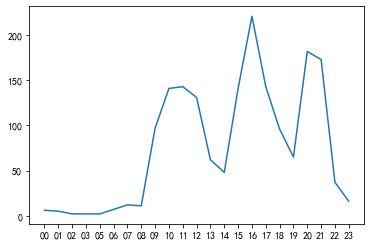

In [32]:
s = df1.groupby("日期")['用户名'].count()
plt.plot(s.index,s.values)
plt.show()

###  2.4 聊天密度日期分布

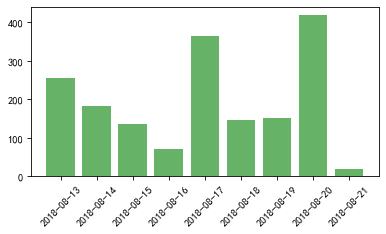

In [33]:
plt.figure(figsize=(6,3),dpi=75)
s = df1.resample('D')['用户名'].count()
plt.bar(s.index, s.values,color="green",alpha=0.6)
plt.xticks(rotation=45)
plt.show()

In [34]:
import datetime
datetime.datetime(2018,8,20).strftime("%w")

'1'

###  2.5 活跃天数最多的用户

按照每个用户进行分组，统计出每个人用户发言的天数。

In [35]:
df2 = df.copy()
df2.日期=df2.日期.dt.strftime('%F') #与'%Y-%m-%d'作用一样
df2.head()

,日期,用户名,聊天内容
0,2018-08-13,古柳_DesertsX(395460632),[人在家中坐，锅从天上来。多图预警，数据科学小项目走起。代码将来源在 ：https://gi...
1,2018-08-13,古柳_DesertsX(395460632),[http://url.cn/5zx2y5b]
2,2018-08-13,‭(1339277368),[[表情][表情]]
3,2018-08-13,古柳_DesertsX(395460632),[[图片]]
4,2018-08-13,古柳_DesertsX(395460632),[[图片]]


In [36]:
df2.shape

(1743, 3)

查询出每个用户以及聊天记录出现的日期，去重：

In [43]:
df2=df2[["日期","用户名"]].drop_duplicates()

In [44]:
df2.shape

(280, 2)

In [45]:
df2['用户名'].value_counts()

晚风拂杨柳(3227648426)           7
vps.http动态ip(1009536067)    6
优雅编程(64520442)              6
古柳_DesertsX(395460632)      6
音乐(812401873)               6
                           ..
山南水北🍃(1437833283)           1
偉(1826505201)               1
Guardianstar(1170667734)    1
(124003293)                 1
g3on(976260302)             1
Name: 用户名, Length: 152, dtype: int64

In [46]:
df2['用户名'].value_counts().index[0]

'晚风拂杨柳(3227648426)'

###  2.6 活跃用户数与发言量的关系

算出每个用户在7天中发言的天数，以及每个用户的总发言量：

In [48]:
a = df2['用户名'].value_counts()
b = df.用户名.value_counts()

In [49]:
df3 =pd.concat([a,b],axis=1)
df3.head()

,用户名,用户名
晚风拂杨柳(3227648426),7,118
vps.http动态ip(1009536067),6,11
优雅编程(64520442),6,74
古柳_DesertsX(395460632),6,31
音乐(812401873),6,80


In [50]:
# 调整索引和列名
df3.index.name='用户名'
df3.columns=['活跃天数','发言量']
df3.head()

,活跃天数,发言量
用户名,,
晚风拂杨柳(3227648426),7,118
vps.http动态ip(1009536067),6,11
优雅编程(64520442),6,74
古柳_DesertsX(395460632),6,31
音乐(812401873),6,80


In [51]:
df3.corr() 
#计算协方差，默认算的是皮尔逊相关系数，值的绝对值越接近于1，说明两个变量的线性相关性越强。

,活跃天数,发言量
活跃天数,1.000,0.712
发言量,0.712,1.000


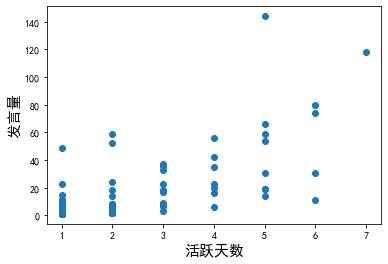

In [52]:
plt.scatter(df3.活跃天数,df3.发言量)
plt.xlabel("活跃天数",fontsize=15)
plt.ylabel("发言量",fontsize=15)
plt.show()

###  2.7 大家都在聊啥

In [53]:
a=''
for i in df.聊天内容:
    for j in i:
        j=j.strip()
        a+=j

去CMD中安装：pip install wordcloud ，或者直接运行下面代码：

In [54]:
# !pip install wordcloud

In [55]:
from wordcloud import WordCloud

# 字体路径
font=r"C:\Windows\Fonts\msyh.ttc"

# 生成对象
wc = WordCloud(font_path=font,width=1600, height=1200
               , mode='RGBA', background_color="white").generate(text=a)

【补充】WordCloud参数详解：
```python
WordCloud(
    font_path=None, #字体路径，需要展现什么字体，就把字体路径+后缀名写上，如：font_path="simhei.ttf"
    width=400, #输出的词云图片的宽度，默认为400
    height=200,#输出的词云图片的高度，默认为200
    margin=2, 
    ranks_only=None,
    prefer_horizontal=0.9, #词语水平方向排版出现的频率,默认为0.9，如果值 <1，则算法将尝试旋转不合适的单词。
    mask=None, #如果参数为空，则使用二维遮罩绘制词云图。如果Mask为非空，设置的宽高值将被忽略，遮罩形状被mask取代。除1全白（#FFFFFF）的部分将不会被绘制，其余部分会用于绘制词云。所以，如果你需要用自己的图片绘制词云，背景图片的底色一定要设置为白色（#FFFFFF），想要显示的形状设置为不是白色的其他颜色。（可以使用PS工具将自己想要的形状复制到一个纯白色的画布上再保存。）
    scale=1, # 按照比例进行放大画布，如设置为1.5，则长和宽都会变成原来的1.5倍
    color_func=None, #可调用的颜色函数对象
    max_words=200, #显示的词的最大个数
    min_font_size=4, #显示的最小的字体大小
    stopwords=None, #停用词（也就是需要屏蔽的词），如果为空，则使用内置的stopwords，如果使用generate_from_frequencies，将被忽略
    random_state=None, #随机数种子
    background_color='black',#背景颜色，默认为黑色
    max_font_size=None,#显示的最大的字体大小
    font_step=1,#字体间距，如果间距大于1，会加快运算速度，但是可能导致拟合度较差
    mode='RGB', #当mode="RGBA"且background_color="None"的时候，会生成透明背景
    relative_scaling='auto',#词频和字体大小的关联性
    regexp=None,  #使用正则表达式分隔输入的文本
    collocations=True, #是否包含两个单词的搭配(双字母组合)
    colormap=None,#为每个单词随机绘制颜色，如果指定了color_func则会忽略
    normalize_plurals=True,#是否删除单词末尾的s，主要是针对英文单词
    contour_width=0, #如果mask不是None并且contour_width>1，将会绘制轮廓
    contour_color='black',#轮廓颜色
    repeat=False, #是否重复单词和短语，直到达到最大的单词或最小的字体大小,默认是False
    include_numbers=False,#是否将数字视为短语
    min_word_length=0,#最小单词长度
    collocation_threshold=30,
)

```

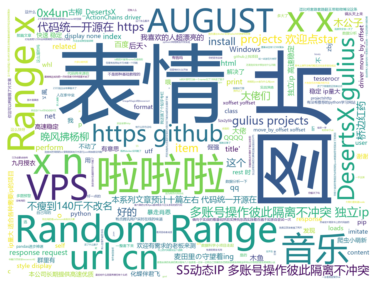

In [56]:
# 显示词云
plt.figure(figsize=(8,5))
plt.imshow(wc, interpolation='bilinear') #图片模糊度，插值算法
plt.axis('off')

# wc.to_file('聊天内容1.png')  #如果想要保存成图片，一定要放在plt.show()之前
plt.show()

关于interpolation参数的详解：    
https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

In [57]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [58]:
mask = np.array(Image.open("dog.jpg"))

In [59]:
mask.shape

(644, 612, 3)

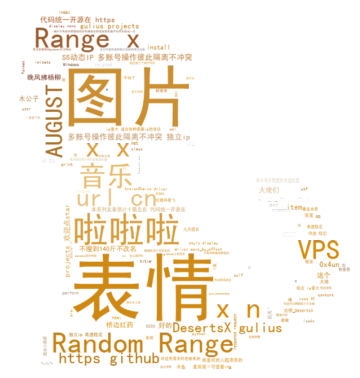

In [60]:
wc = WordCloud(font_path="simhei.ttf",mask=mask,mode='RGBA', background_color=None).generate(text=a)

# 从图片中生成颜色
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors) #重置词云图的颜色

# 显示词云
plt.figure(figsize=(10,6),dpi=80)
plt.imshow(wc, interpolation='bilinear') #图片模糊度，插值算法
plt.axis('off')

wc.to_file('QQ聊天内容词云图.png')
plt.show()

如果想手动对中文文章进行切分，可以使用jieba包（专门的中文分词包）

结巴分词的分词模式分为三种：
>(1)精确模式：将句子最精确地切开,适合文本分析  
>(2)全模式：把句子中所有的可以成词的词语都扫描出来, 速度快,但是不能解决歧义问题        
>(3)搜索引擎模式：在精确模式的基础上,对长词再次切分,提高召回率,适合用于搜索引擎分词    

In [61]:
# !pip install jieba

In [62]:
import jieba

In [63]:
text = "你以为自己已经掌握了所有的知识点，结果面试官一问，你就脑子一片空白，一句也说不出来，或者半天蹦出一句话。"

In [64]:
ex_list1 = jieba.cut(text)
ex_list2 = jieba.cut(text , cut_all= True)
ex_list3 = jieba.cut_for_search(text)

In [65]:
print("精准模式:"+'/'.join(ex_list1))
print("全模式:"+'/'.join(ex_list2))
print("搜索引擎模式："+'/'.join(ex_list3))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\60142\AppData\Local\Temp\jieba.cache
Loading model cost 0.473 seconds.
Prefix dict has been built successfully.


精准模式:你/以为/自己/已经/掌握/了/所有/的/知识点/，/结果/面试官/一问/，/你/就/脑子/一片空白/，/一句/也/说不出来/，/或者/半天/蹦出/一句/话/。
全模式:你/以为/自己/已经/掌握/了/所有/的/知识/知识点/，/结果/面试/面试官/一/问/，/你/就/脑子/一片/一片空白/空白/，/一句/也/说不出/说不出来/不出/出来/，/或者/半天/蹦出/一句/话/。
搜索引擎模式：你/以为/自己/已经/掌握/了/所有/的/知识/知识点/，/结果/面试/面试官/一问/，/你/就/脑子/一片/空白/一片空白/，/一句/也/不出/出来/说不出/说不出来/，/或者/半天/蹦出/一句/话/。


从上面测试结果可以看出，在全模式和搜索引擎模式下，分词比精准模式更加细碎。但是也能够看出，这三种模式都没有很好的处理最后“一句话”这个词，这时候我们可以添加用户自定义字典：
> 步骤1：在任意文件夹下新建一个txt文件   
> 步骤2：将想添加的词，写入文件中，注意格式（每行一个词，规则为：词语+空格+词频+空格+词性，这里词频和词性都可以省略）    
> 步骤3：在结巴中加入自定义字典的路径   

In [66]:
jieba.load_userdict("mydict.txt")

In [67]:
ex_list1 = jieba.cut(text)
ex_list2 = jieba.cut(text , cut_all= True)
ex_list3 = jieba.cut_for_search(text)

print("精准模式:"+'/'.join(ex_list1))
print("全模式:"+'/'.join(ex_list2))
print("搜索引擎模式："+'/'.join(ex_list3))

精准模式:你/以为/自己/已经/掌握/了/所有/的/知识点/，/结果/面试官/一问/，/你/就/脑子/一片空白/，/一句/也/说不出来/，/或者/半天/蹦出/一句话/。
全模式:你/以为/自己/已经/掌握/了/所有/的/知识/知识点/，/结果/面试/面试官/一/问/，/你/就/脑子/一片/一片空白/空白/，/一句/也/说不出/说不出来/不出/出来/，/或者/半天/蹦出/一句/一句话/。
搜索引擎模式：你/以为/自己/已经/掌握/了/所有/的/知识/知识点/，/结果/面试/面试官/一问/，/你/就/脑子/一片/空白/一片空白/，/一句/也/不出/出来/说不出/说不出来/，/或者/半天/蹦出/一句/一句话/。


使用jieba处理聊天内容：

In [69]:
jieba.load_userdict("mydict.txt") #可以在前面建好的mydict.txt文件中直接增加你需要保留的词语

In [70]:
a = ''
for i in df.聊天内容:
    for j in i:
        j=j.strip()
        a+=' '.join(jieba.cut(j))

In [76]:
# 停用词
with open("stopwords.txt",mode='r',encoding='utf-8-sig') as file:
    stopwords=file.read().splitlines()

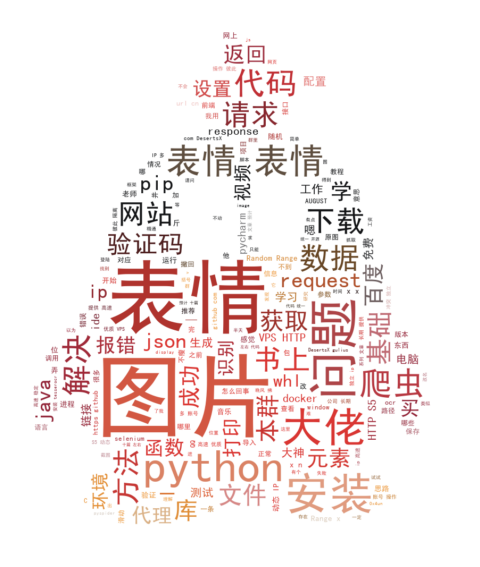

In [80]:
mask = np.array(Image.open("qq1.jpg"))

wc = WordCloud(font_path="simhei.ttf"
               ,mask=mask,mode='RGBA'
               ,stopwords=stopwords
               ,margin=8
               ,random_state=420
               ,background_color="white").generate(text=a)

# 从图片中生成颜色
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors) #重置词云图的颜色

# 显示词云
plt.figure(figsize=(10,6),dpi=120)
plt.imshow(wc, interpolation='bilinear') #图片模糊度（双线性）,插值算法
plt.axis('off')

wc.to_file('QQ聊天内容词云图.png')
plt.show()

【更多学习内容详见官网】    
> 词云：https://amueller.github.io/word_cloud/     
> jieba：https://pypi.org/project/jieba/     